In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('G:/Rahul Data/GCD Related/INSAID/Dataset/Concrete_Data_Yeh.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
X = data.drop('csMPa',axis=1)
y = data['csMPa']
print(X.head())
print('\n')
print(y.head())

   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  
0          676.0   28  
1          676.0   28  
2          594.0  270  
3          594.0  365  
4          825.5  360  


0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: csMPa, dtype: float64


In [5]:
import sklearn.metrics

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)

print('Coefficients Are: ')
print(lr.coef_)
print('\n')
print('Training Data - R2 Score')
print(lr.score(X_train,y_train))
print('Testing R2 Score')
print(lr.score(X_test,y_test))

Coefficients Are: 
[ 0.12226049  0.10551064  0.09218552 -0.15212926  0.25469802  0.02128236
  0.02197247  0.11598932]


Training Data - R2 Score
0.6210697467843866
Testing R2 Score
0.5911879648718987


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('sc',StandardScaler()),('lr',LinearRegression())])

pipe.fit(X_train,y_train)
pipe.predict(X_test)

print('Training Data - R2 Score')
print(pipe.score(X_train,y_train))
print('Testing R2 Score')
print(pipe.score(X_test,y_test))

Training Data - R2 Score
0.6210697467843866
Testing R2 Score
0.5911879648718985


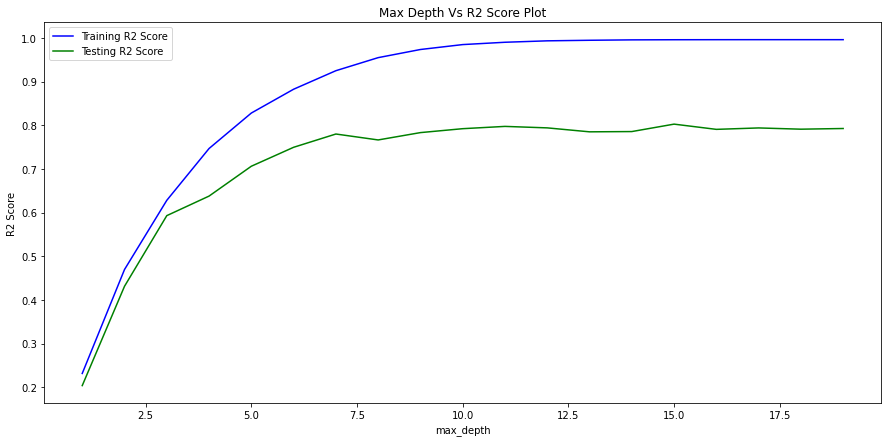

In [7]:
param_rang = np.arange(1,20,1)

train_score,test_score = validation_curve(DecisionTreeRegressor(),X_train,y_train,param_name='max_depth',param_range=param_rang,cv=3,scoring='r2',n_jobs=1)

train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)

test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.figure(figsize=(15,7))
plt.plot(param_rang,train_mean,label='Training R2 Score',color='b')
plt.plot(param_rang,test_mean,label='Testing R2 Score',color='g')


plt.legend(loc='best')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('Max Depth Vs R2 Score Plot')

plt.show()

In [8]:
par = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]}

gs = GridSearchCV(DecisionTreeRegressor(),param_grid=par,scoring='r2',cv=5,n_jobs=1)
gs.fit(X_train,y_train)
gs.predict(X_test)

print(gs.best_params_)

{'max_depth': 24}


In [11]:
dt = DecisionTreeRegressor(max_depth=13)

dt.fit(X_train,y_train)
dt.predict(X_test)

print('R2 Score Details')
print('\n')
print('Training R2 Score')
print(dt.score(X_train,y_train))
print('\n')
print('Testing R2 Score')
print(dt.score(X_test,y_test))

scoresdt = cross_val_score(DecisionTreeRegressor(),X_train,y_train,scoring='r2',cv=3,n_jobs=1)
print('\n')
print('Cross Validation Scores')
print(scoresdt)
print('\n')
print('Average R2 Score')
print(np.mean(scoresdt))

R2 Score Details


Training R2 Score
0.9937952493430551


Testing R2 Score
0.8970041685392746


Cross Validation Scores
[0.83019267 0.76450964 0.84045341]


Average R2 Score
0.8117185723423735


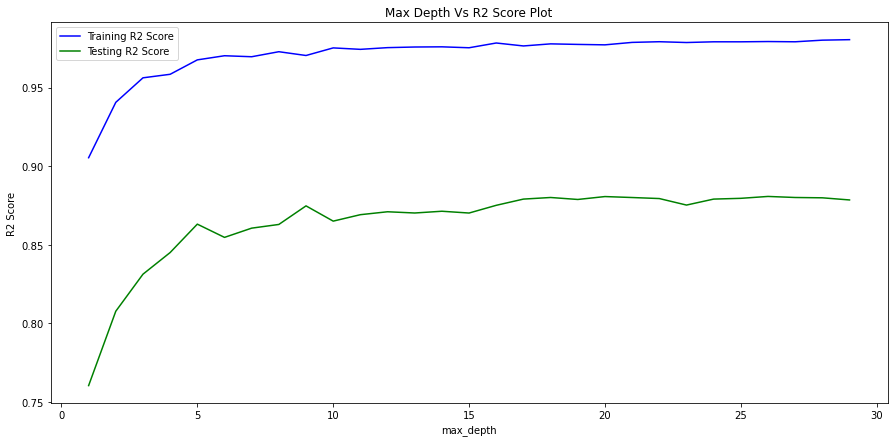

In [12]:
par_rag = np.arange(1,30,1)

train_score,test_score = validation_curve(RandomForestRegressor(),X_train,y_train,param_name='n_estimators',param_range=par_rag,cv=3,scoring='r2',n_jobs=1)

train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)

test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

plt.figure(figsize=(15,7))
plt.plot(par_rag,train_mean,label='Training R2 Score',color='b')
plt.plot(par_rag,test_mean,label='Testing R2 Score',color='g')


plt.legend(loc='best')
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('Max Depth Vs R2 Score Plot')

plt.show()

In [13]:
rf = RandomForestRegressor(n_estimators=18)

rf.fit(X_train,y_train)
rf.predict(X_test)

print('R2 Score Details')
print('\n')
print('Training R2 Score')
print(rf.score(X_train,y_train))
print('\n')
print('Testing R2 Score')
print(rf.score(X_test,y_test))
print('\n')
print('Feature Importance')
print(rf.feature_importances_)

R2 Score Details


Training R2 Score
0.9799672220419484


Testing R2 Score
0.9221506005868803


Feature Importance
[0.32693796 0.07596549 0.019384   0.12615913 0.06264047 0.02624864
 0.04045787 0.32220644]


In [14]:
rf.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1867513048),
 DecisionTreeRegressor(max_features='auto', random_state=1782056886),
 DecisionTreeRegressor(max_features='auto', random_state=840713215),
 DecisionTreeRegressor(max_features='auto', random_state=727812807),
 DecisionTreeRegressor(max_features='auto', random_state=638800037),
 DecisionTreeRegressor(max_features='auto', random_state=300321950),
 DecisionTreeRegressor(max_features='auto', random_state=165517476),
 DecisionTreeRegressor(max_features='auto', random_state=2020030767),
 DecisionTreeRegressor(max_features='auto', random_state=1509844301),
 DecisionTreeRegressor(max_features='auto', random_state=457015694),
 DecisionTreeRegressor(max_features='auto', random_state=336691932),
 DecisionTreeRegressor(max_features='auto', random_state=1351713500),
 DecisionTreeRegressor(max_features='auto', random_state=704944755),
 DecisionTreeRegressor(max_features='auto', random_state=1587413065),
 DecisionTreeRegressor(max_f

In [15]:
scoresdt = cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5,scoring='r2')
print(scoresdt)
print('\n')
print('Average R2 Score')
print(np.mean(scoresdt))

[0.90993241 0.8547459  0.86797502 0.9166369  0.91087092]


Average R2 Score
0.892032228115205


In [16]:
params = [{'n_estimators' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}]

search = GridSearchCV(RandomForestRegressor(),param_grid=params,scoring='r2',n_jobs=1,cv=5)
search.fit(X_train,y_train)
search.predict(X_test)

print(search.best_params_)

{'n_estimators': 21}


In [17]:
search.best_estimator_

RandomForestRegressor(n_estimators=21)

In [18]:
search.best_score_

0.890915174505507

In [19]:
search.cv_results_

{'mean_fit_time': array([0.01071773, 0.01539059, 0.02040219, 0.02518024, 0.03185043,
        0.04137106, 0.04328513, 0.0465796 , 0.05252585, 0.05875883,
        0.06368966, 0.0683877 , 0.07263818, 0.08423567, 0.08748832,
        0.09016056, 0.09560523, 0.09654193, 0.10062852, 0.11286349,
        0.11417561, 0.11866598, 0.12227831, 0.12637792, 0.13342857,
        0.14336162, 0.14209452, 0.14757609, 0.15126019, 0.15671797]),
 'std_fit_time': array([0.00125811, 0.00033145, 0.00066167, 0.00068721, 0.00134954,
        0.00256964, 0.0032323 , 0.00205656, 0.00155946, 0.00135852,
        0.00113324, 0.00211369, 0.00065796, 0.00719543, 0.00459784,
        0.00149561, 0.00258341, 0.00169171, 0.00281257, 0.00384024,
        0.00225177, 0.00214017, 0.00082742, 0.00292929, 0.00279816,
        0.0053472 , 0.00182012, 0.00172782, 0.00189433, 0.0016995 ]),
 'mean_score_time': array([0.00512738, 0.00456772, 0.00444026, 0.00439963, 0.0047399 ,
        0.00603285, 0.00498576, 0.00557246, 0.0057188 , 0.00